In [1]:
import numpy as np
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets as skdata

In [2]:
'''
Name: Escalante, Tomas

Collaborators: N/A

Collaboration details: N/A

Summary:
Report your scores here.

'''


'\nName: Doe, John (Please write names in <Last Name, First Name> format)\n\nCollaborators: Doe, Jane (Please write names in <Last Name, First Name> format)\n\nCollaboration details: Discussed <function name> implementation details with Jane Doe.\n\nSummary:\nReport your scores here.\n\n'

In [3]:
def plot_images(X, n_row, n_col, title):
    '''
    Creates n_row by n_col panel of images

    Args:
        X : numpy
            N x h x w numpy array
        n_row : int
            number of rows in figure
        n_col : list[str]
            number of columns in figure
        title : str
            title of plot
    '''

    fig = plt.figure()
    fig.suptitle(title)

    for i in range(1, n_row * n_col + 1):

        ax = fig.add_subplot(n_row, n_col, i)

        x_i = X[i, ...]
        if len(x_i.shape) == 1:
            x_i = np.expand_dims(x_i, axis=0)

        ax.imshow(x_i)

        plt.box(False)
        plt.axis('off')

def compute_eigenvalues(X, sorted=False):
    '''
    Computes eigenvalues for a dataset X

    Args:
        X : numpy
            N x d numpy array
        sorted : bool
            if set, then sort eigenvalues descending

    Returns:
        S : numpy
            d element array
    '''

    # TODO: Compute eigenvalues of a dataset X

    # Compute the mean along axis 0 which refers to N
    X_mean = np.mean(X, axis=0)

    # Center the data
    B = X - X_mean

    # Compute covariance: 1 / (N - 1) B^T B
    C = 1.0 / (X.shape[0] - 1) * np.matmul(B.T, B)

    # Eigen decomposition
    S, _ = np.linalg.eig(C)

    if sorted:
        # Sort the eigenvalues in descending order
        order = np.argsort(S)[::-1]
        S = S[order]

    return S

def plot_eigenvalues(X):
    '''
    Plots eigenvalues for a dataset X

    Args:
        X : numpy
            N x d numpy array
    '''

    # Compute eigenvalues and sort them
    S_sorted = compute_eigenvalues(X, sorted=True)

    # Plot eigenvales in descending order
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(S_sorted)

    fig.suptitle('Sorted Eigenvalues')

    ax.set_xlabel('Eigenvectors')
    ax.set_ylabel('Eigenvalues')

In [4]:
'''
Implementation of Principal Component Analysis (PCA) for dimensionality reduction
'''
class PrincipalComponentAnalysis(object):

    def __init__(self, k):
        # Number of eigenvectors to keep
        self.__k = k

        # Mean of the dataset
        self.__mean = None

        # Linear weights or transformation to project to lower subspace
        self.__weights = None

        # Eigenvalues of the dataset
        self.__eigenvalues = None

    def __center(self, X):
        '''
        Centers the data to zero-mean

        Args:
            X : numpy
                N x d feature vector

        Returns:
            numpy : N x d centered feature vector
        '''

        # TODO: Center the data

        # Compute mean
        X_mean = np.mean(X, axis=0)

        # Store mean for use of reconstruction
        self.__mean = X_mean

        # Center the data
        B = X - X_mean

        return B

    def __covariance_matrix(self, X):
        '''
        Computes the covariance matrix of a feature vector

        Args:
            X : numpy
                N x d feature vector

        Returns:
            numpy : d x d covariance matrix
        '''

        # TODO: Compute the covariance matrix

        C = 1.0 / (X.shape[0] - 1) * np.matmul(X.T, X)

        return C

    def __fetch_weights(self, C):
        '''
        Obtains the top k eigenvectors (weights) from a covariance matrix C

        Args:
            C : numpy
                d x d covariance matrix

        Returns:
            numpy : d x k eigenvectors
        '''

        # TODO: Obtain the top k eigenvectors

        # Make sure that we have k less than d, C has shape (d, d)
        assert self.__k <= C.shape[0]

        # Eigen decomposition
        S, V = np.linalg.eig(C)

        # Sort the eigenvalues in descending order
        order = np.argsort(S)[::-1]

        # Store the sorted eigenvalues for generating new samples
        self.__eigenvalues = S[order]

        # Select the top k eigenvectors
        W = V[:, order][:, 0:self.__k]

        # Store weights
        self.__weights = W

        return W

    def project_to_subspace(self, X):
        '''
        Project data X to lower dimension subspace using the top k eigenvectors

        Args:
            X : numpy
                N x d covariance matrix
            k : int
                number of eigenvectors to keep

        Returns:
            numpy : N x k feature vector
        '''

        # TODO: Computes transformation to lower dimension and project to subspace

        # Center the data
        B = self.__center(X)

        # Compute the covariance matrix
        C = self.__covariance_matrix(B)

        # Obtain the weights to project to subspace
        W = self.__fetch_weights(C)

        # Project B to subspace Z using the weights
        Z = np.matmul(B, W)

        return Z

    def reconstruct_from_subspace(self, Z):
        '''
        Reconstruct the original feature vector from the latent vector

        Args:
            Z : numpy
                N x k latent vector

        Returns:
            numpy : N x d feature vector
        '''

        # TODO: Reconstruct the original feature vector

        X_hat = np.matmul(Z, self.__weights.T) + self.__mean

        return X_hat

    def generate_new_samples(self, Z, n_sample):
        '''
        Generates new data points by sampling from Z

        Args:
            Z : numpy
                N x k latent vector

        Returns:
            numpy : N x d feature vector
        '''

        # TODO: Generate new samples

        # We need the eigenvalues so we can sample from N(0, sigma^2)
        # Eigenvalues S = sigma^2

        # np.random.normal(mean, stddev, shape), stddev = sqrt(sigma^2)
        # We want n samples of d or k dimensions (n, k)
        Z_sample_digits_2s = np.random.normal(0.0, np.sqrt(self.__eigenvalues), (n_sample, Z.shape[1]))

        # This gives us X_hat which is (n, d) since Z is (n, k)
        X_hat = self.reconstruct_from_subspace(Z_sample_digits_2s)

        return X_hat

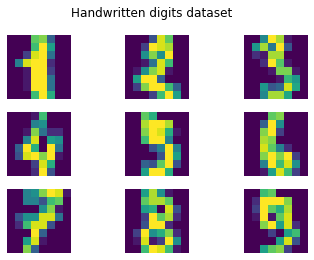

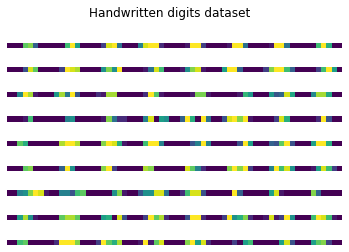

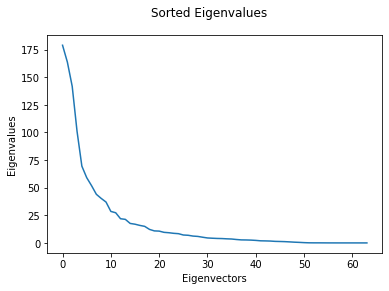

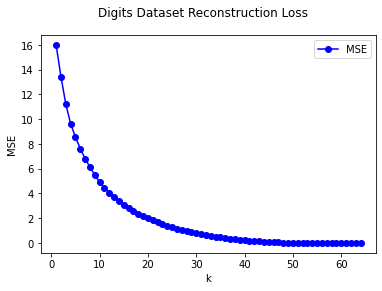

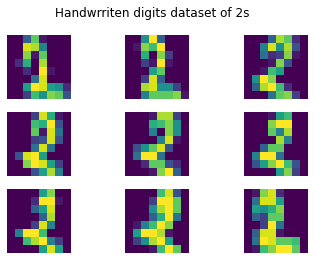

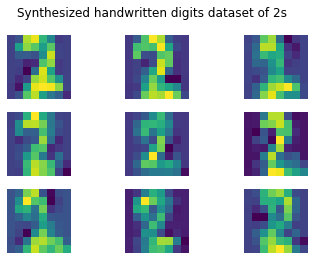

In [5]:
if __name__ == '__main__':

    # Load the digits dataset 1797 samples of 8 by 8 dimensions
    digits_dataset = skdata.load_digits()
    X_digits = digits_dataset.data
    y_digits = digits_dataset.target

    '''
    PCA for handwritten digits reconstruction
    '''

    # TODO: Compute the number of dimensions in the dataset (N, 8, 8) or (N, 64) = (N, 8 x 8)
    n_dim = np.prod(X_digits.shape[1:])

    # TODO: Reshape handwritten digits dataset to (N, 8, 8) as images
    X_digits = np.reshape(X_digits, (-1, 8, 8))

    # TODO: Plot 3 x 3 panel of handwritten digits and name is 'Handwritten digits dataset'
    plot_images(
        X=X_digits,
        n_row=3,
        n_col=3,
        title='Handwritten digits dataset')

    # TODO: Vectorize handwritten digits dataset (N, 8, 8) -> (N, 64)
    X_digits = np.reshape(X_digits, (-1, n_dim))

    # TODO: Plot 9 x 1 panel of handwritten digits and name is 'Vectorized handwritten digits dataset'
    plot_images(
        X=X_digits,
        n_row=9,
        n_col=1,
        title='Handwritten digits dataset')

    # TODO: Plot eigenvalues for digits dataset
    plot_eigenvalues(X_digits)

    # TODO: Select K from 1 to max number of dimensions
    K = range(1, n_dim + 1)  # [1, 2, 3, ..., 64]

    # MSE scores to keep track of loss from compression
    mse_scores = []

    for k in K:
        # TODO: Initialize PrincipalComponentAnalysis
        pca = PrincipalComponentAnalysis(k=k)

        # TODO: Project the data to subspace
        Z_digits = pca.project_to_subspace(X_digits)

        # TODO: Reconstruct the original data
        X_hat_digits = pca.reconstruct_from_subspace(Z_digits)

        # TODO: Measures mean squared error between original data and reconstructed data
        mse_score = skmetrics.mean_squared_error(X_digits, X_hat_digits)

        # Save MSE score
        mse_scores.append(mse_score)

    # Creat plot for MSE for reconstruction
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.suptitle('Digits Dataset Reconstruction Loss')

    ax.plot(K, mse_scores, marker='o', color='b', label='MSE')
    ax.legend(loc='best')
    ax.set_xlabel('k')
    ax.set_ylabel('MSE')

    '''
    PCA as a generative model
    '''

    # TODO: Select all 2's from the digit dataset
    idx = np.where(y_digits == 2)[0]
    X_digits_2s = X_digits[idx, :]

    # TODO: Reshape handwritten digits dataset of 2s to (N, 8, 8)
    X_digits_2s = np.reshape(X_digits_2s, (-1, 8, 8))

    # TODO: Plot 3 x 3 panel of handwritten digits and name is 'Handwritten digits dataset of 2s'
    plot_images(
        X=X_digits_2s,
        n_row=3,
        n_col=3,
        title='Handwrriten digits dataset of 2s')

    # TODO: Vectorize handwritten digits dataset (N, 64)
    X_digits_2s = np.reshape(X_digits_2s, (-1, n_dim))

    # TODO: Compute PCA and keep all principal components
    pca_digits_2s = PrincipalComponentAnalysis(k=n_dim)
    Z_digits_2s = pca_digits_2s.project_to_subspace(X_digits_2s)

    # TODO: Generate novel samples by sampling from subspace Z
    X_hat_digits_2s = pca_digits_2s.generate_new_samples(Z_digits_2s, n_sample=20)

    X_hat_digits_2s = np.reshape(X_hat_digits_2s, (-1, 8, 8))

    # TODO: Plot 3 x 3 panel of handwritten digits of newly generated data
    plot_images(
        X=X_hat_digits_2s,
        n_row=3,
        n_col=3,
        title='Synthesized handwritten digits dataset of 2s')

    # Show plots
    plt.show()